# Investigate data spectrums (real and synthetic data)
KAUST, 2022

## If you want to use Madagascar in your jupyter please use jupyter notebook, because vs code IS NOT ABLE to import madagascar python api correctly. api._cmd('source /home/plotnips/RSF/share/madagascar/etc/env.sh')


In [1]:
import os
import sys
sys.path.append(os.path.abspath('../'))
import pyapi_denise_pavel as api
print(os.getcwd())
print(f'Python: {sys.prefix}')
api._cmd('source /home/plotnips/RSF/share/madagascar/etc/env.sh')
import m8r as sf
print('hello')

/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/for_pasha
Python: /home/plotnips/anaconda3/envs/lw
hello


In [2]:
sys.path.append(os.path.abspath('../codes_server'))
# sys.path.append(os.path.abspath('./utils'))
from F_utils import *
from F_fwi import *
import copy
from glob import glob
# import glob
import numpy as np
import importlib
import multiprocessing
import segyio
from scipy import signal, ndimage
from natsort import natsorted
from skimage.transform import rescale, resize
from utils import shared as sd
from utils import loaders as ld
from utils import vis
from IPython.display import clear_output
import pyapi_denise_pavel as api
# create_sbatch_file_for_fwi_folder('./for_pasha/out_for_pasha/fwi_full_spectrum_vanilla')
# results_path='./out_for_pasha/fwi_full_spectrum'
# os.system(f"rm -r {results_path}")
print(filter_seismic_data)
d=api.Denise('/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master',verbose=1)
# d=api.Denise('/Users/pavelplotnitskii/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master',verbose=1)
print(d.get_shots_from_datadir)
print(d.get_shots_from_directory)
print(sys.path)
import nest_asyncio
nest_asyncio.apply()

<function filter_seismic_data at 0x1492d90cae50>
Init Python 3 API for Denise-Black-Edition.
Check binary in /home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/bin/denise
Parse /home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/par/DENISE_marm_OBC.inp
Current directory is /home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/for_pasha
Init paths at ./outputs/
<bound method Denise.get_shots_from_datadir of DENISE-Black-Edition:
	/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master
Save folder:
	./outputs/
Run .help() for more details>
<bound method Denise.get_shots_from_directory of DENISE-Black-Edition:
	/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master
Save folder:
	./outputs/
Run .help() for more details>
['/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/for_pasha', '', '/home/plotnips/RSF/lib/python2.7/dist-packages', '/home/plotn

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# mpl.rcParams['figure.dpi']= 100
fontsize = 10
params = {
    # 'text.latex.preamble': ['\\usepackage{gensymb}'],
    # 'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'figure.dpi' : 300,
    # 'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize':fontsize,  # fontsize for x and y labels (was 10)
    'axes.titlesize':fontsize,
    'font.size':fontsize,  # was 10
    'legend.fontsize': fontsize,  # was 10
    'xtick.labelsize':fontsize,
    'ytick.labelsize':fontsize,
    # 'text.usetex': True,
    # 'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
}
mpl.rcParams.update(params)

# Init Denise API

In [4]:
root_fwi = './out_for_pasha/'
denise_root = '../'
d = api.Denise(denise_root, verbose=0)
d.save_folder = root_fwi
d.set_paths()
def divmax(x): return x / np.max(np.abs(x))

Init Python 3 API for Denise-Black-Edition.
Check binary in ../bin/denise


In [5]:
print(os.getcwd())

/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/for_pasha


80/80
Before prep:	(80, 648, 3526)
Data cube:	(80, 324, 3000)
Extended cube:	(80, 324, 3100)
[80, 324, 3050] (80, 324, 3000)
[80, 324, 3150] (80, 324, 3100)
25.0
Assume even average spacing between sources
 150.0 m ~ 6 grid nodes
First source:	1125.0 m
Last source:	12950.0 m
150.0
name:	
x	(80,):	min: 1125.0	max: 12975.0
y	(80,):	min: 50.0	max: 50.0
wavelets:	None
z	(80,):	min: 0.0	max: 0.0
nshot:	80
td	(80,):	min: 0.0	max: 0.0
fc	(80,):	min: 8.0	max: 8.0
amp	(80,):	min: 1.0	max: 1.0
angle	(80,):	min: 0.0	max: 0.0
QUELLTYPB:	1
src_type	(80,):	min: 1.0	max: 1.0
drec:	25.0 m
x	(324,):	min: 1275.0	max: 9350.0
y	(324,):	min: 100.0	max: 100.0
many:	[x	(324,):	min: 1275.0	max: 9350.0
y	(324,):	min: 100.0	max: 100.0
name:	]
x	(324,):	min: 1275.0	max: 9350.0
y	(324,):	min: 100.0	max: 100.0
many:	[x	(324,):	min: 1275.0	max: 9350.0
y	(324,):	min: 100.0	max: 100.0
name:	]
(152, 600)
(152, 600)
(152, 500)
12500.0


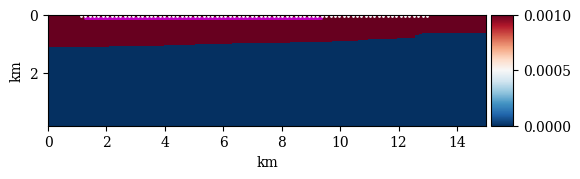

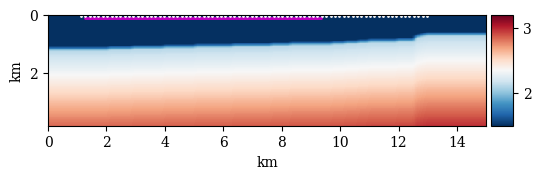

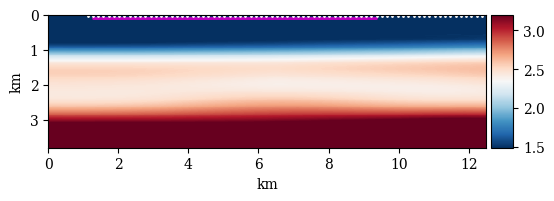

Save /home/plotnips/Dropbox/Apps/Overleaf/draft_Geophysics_FWI_init_model_prediction/paper_geophysics/Fig/raw_spec.png


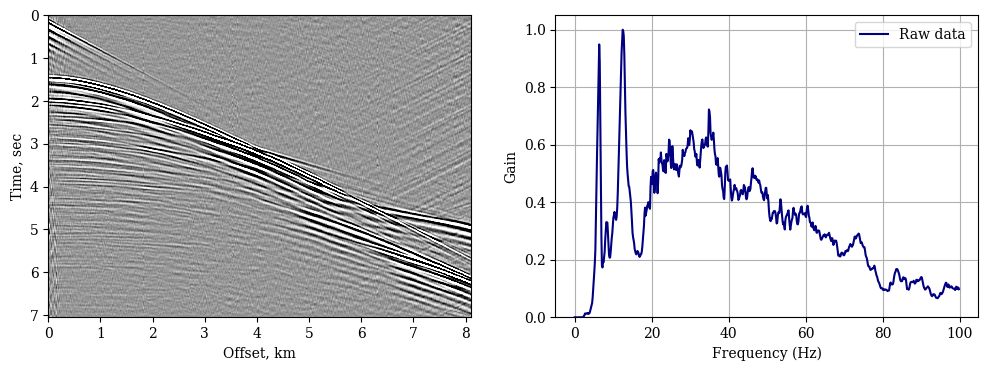

In [6]:
%run ./fwi_shared_check_plotting.ipynb

/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/for_pasha
Save /home/plotnips/Dropbox/Apps/Overleaf/draft_Geophysics_FWI_init_model_prediction/paper_geophysics/Fig/data_field_synth.png


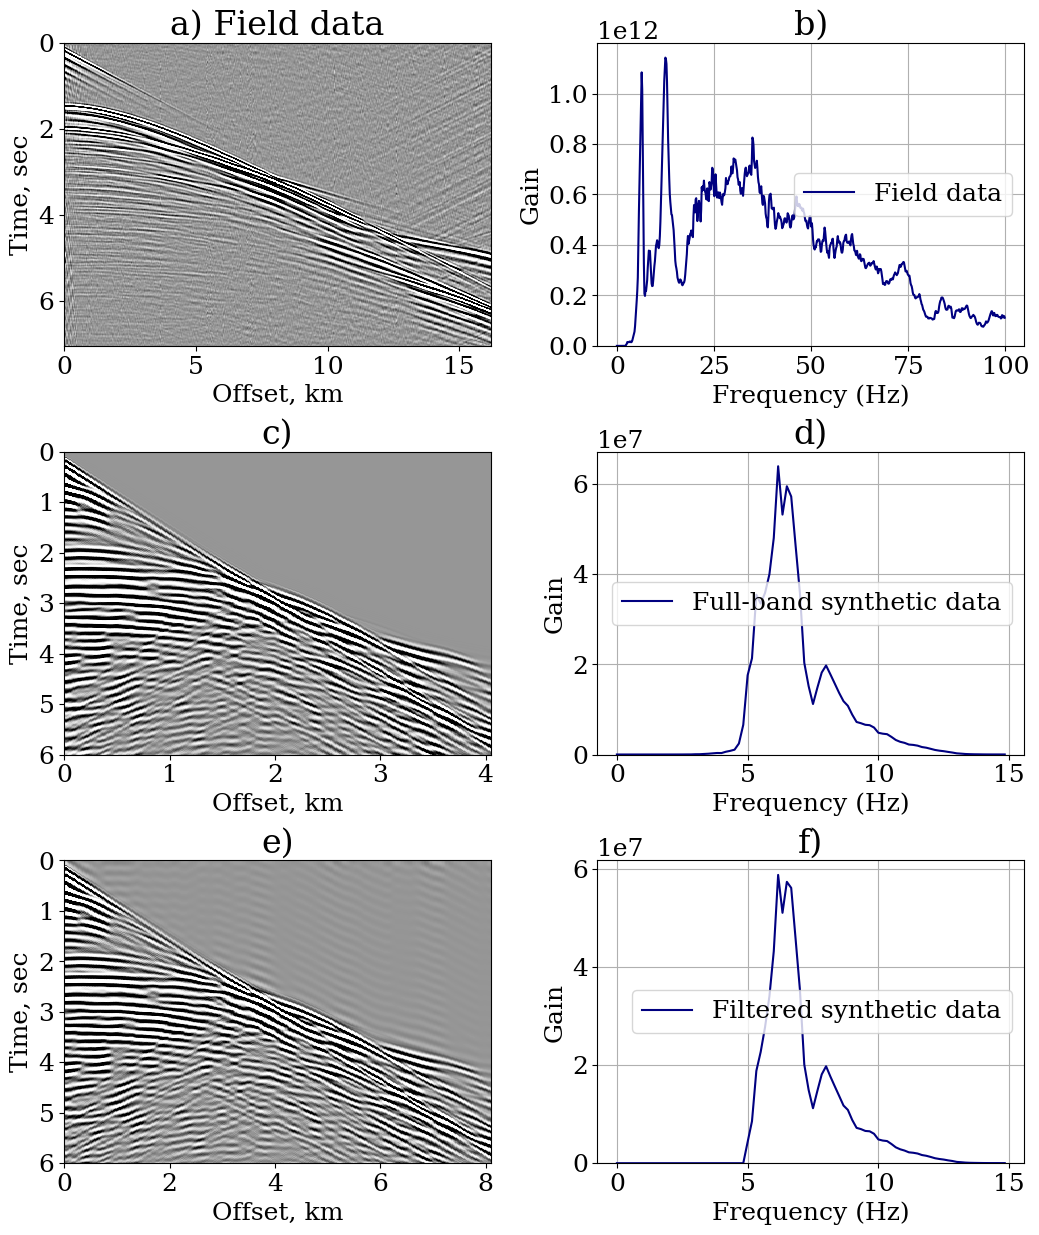

In [7]:
from utils import vis
fontsize = 18
params = {
    # 'text.latex.preamble': ['\\usepackage{gensymb}'],
    # 'image.origin': 'lower',
    'image.interpolation': 'nearest',
    # 'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 300,  # to adjust notebook inline plot size
    'axes.labelsize':fontsize,  # fontsize for x and y labels (was 10)
    'axes.titlesize':fontsize,
    'font.size':fontsize,  # was 10
    'legend.fontsize': fontsize,  # was 10
    'xtick.labelsize':fontsize,
    'ytick.labelsize':fontsize,
    # 'text.usetex': True,
    # 'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
}
matplotlib.rcParams.update(params)

print(os.getcwd())
# denise_dir='../fwi/cgg_real_data/cnn_14_1/fld'
root_dir='/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master'
data_dir=os.path.join(root_dir,'fwi/ws_fwi_50_strategy_l2_3/Marmousi_true/fld')
field_data_dir=os.path.join(root_dir,'for_pasha/su_field')
# field_data_dir=os.path.join(root_dir,'for_pasha/su_field_high_pass_5_hz')
shots_synthetic,filenames=d.get_shots_from_directory(os.path.join(data_dir,'su'),keys=['_p'],return_filenames=True)
shots_field,filenames_field=d.get_shots_from_directory(field_data_dir,keys=['_p'],return_filenames=True)
dDT=0.002; dt=dDT
corner_frequency=5
fmax=15
field_shot_index=11
for ishot in [4] :
    fig, ax = plt.subplots(3, 2, figsize=(12,14))
    shot=shots_synthetic[ishot]
    filtered_shot=bandpass(shot,flo=corner_frequency,dt=dDT,order=8,btype='high')
    filtered_shot=zero_below_freq(filtered_shot,corner_frequency,dt,disable=False,reverse=False)
#     vis.plot_shot(ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0]);
    vis.plot_shot(shot, dt=dDT, dx=12.5, pclip=0.05, colorbar=False, ax=ax[1,0])
    vis.plot_spectra_dictlist([{'data': shot, 'line': 'navy', 'label': 'Full-band synthetic data'}], dt=dDT, fmax=fmax, norm=False, ax=ax[1,1])
    vis.plot_shot(filtered_shot, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[2,0])
    vis.plot_spectra_dictlist([{'data': filtered_shot, 'line': 'navy', 'label': 'Filtered synthetic data'}], dt=dDT,fmax=fmax, norm=False, ax=ax[2,1])
    
    vis.plot_shot(ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0,0])
    vis.plot_spectra_dictlist([{'data':shot_data, 'line': 'navy', 'label': 'Field data'}], dt=dDT, fmax=100, norm=False, ax=ax[0,1])
title_fontsize=24
ax[0,0].set_title('a) Field data',fontsize=title_fontsize)
ax[0,1].set_title('b)',fontsize=title_fontsize)
ax[1,0].set_title('c)',fontsize=title_fontsize)
ax[1,1].set_title('d)',fontsize=title_fontsize)
ax[2,0].set_title('e)',fontsize=title_fontsize)
ax[2,1].set_title('f)',fontsize=title_fontsize)
ax[0,1].legend(loc='center right')
ax[1,1].legend(loc='center right')
ax[2,1].legend(loc='center right')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
vis.savefig('data_field_synth.png')

## Picture to poster

/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/for_pasha
Save /home/plotnips/Dropbox/Apps/Overleaf/draft_Geophysics_FWI_init_model_prediction/paper_geophysics/Fig/data_field_synth2.png
Save /home/plotnips/Dropbox/Apps/Overleaf/draft_Geophysics_FWI_init_model_prediction/paper_geophysics/Fig/data_field_synth3.png


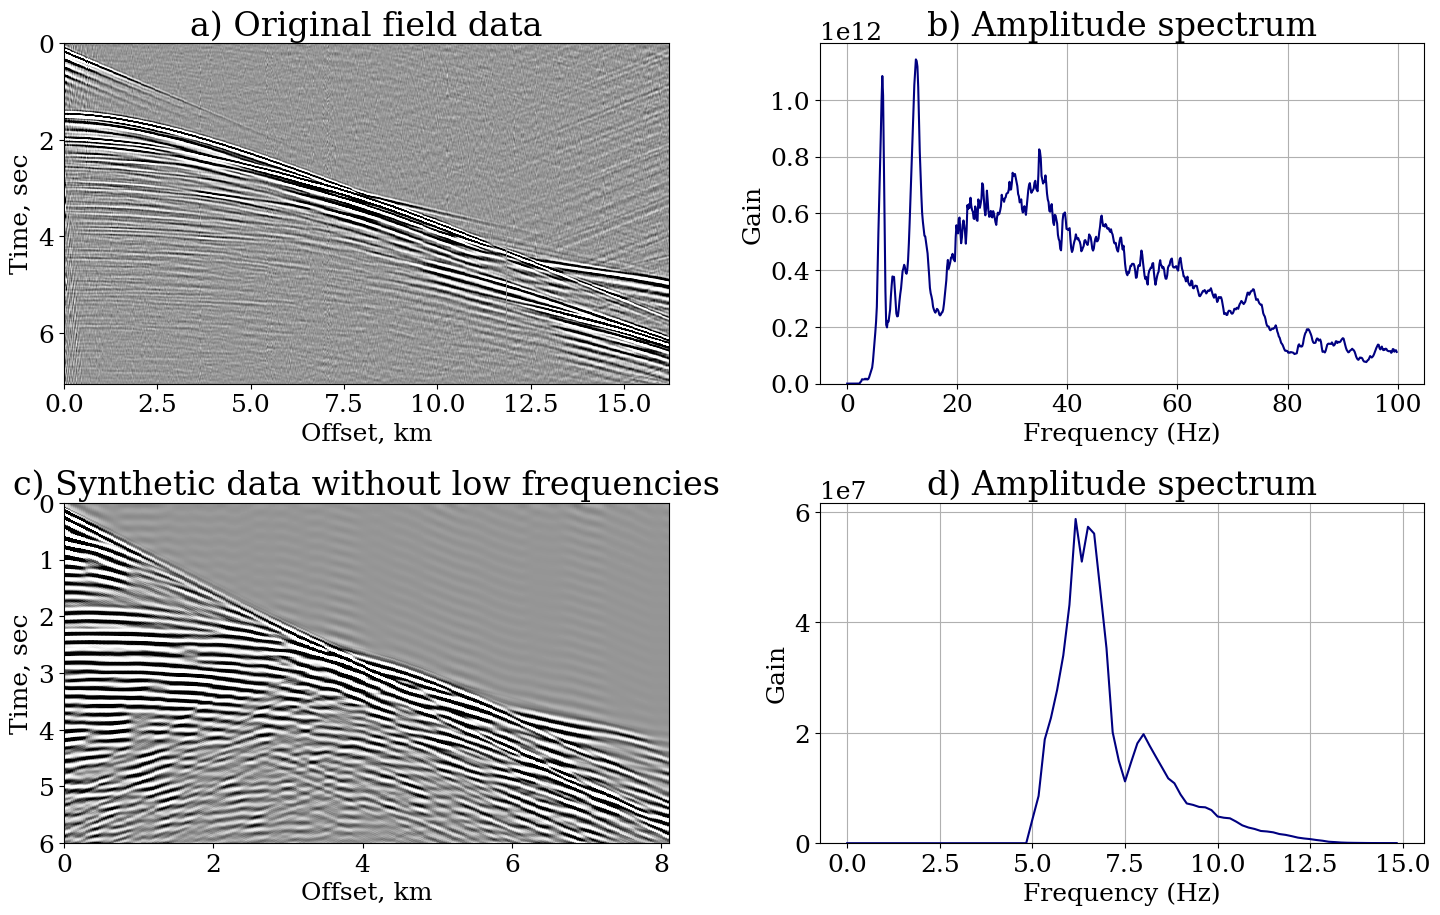

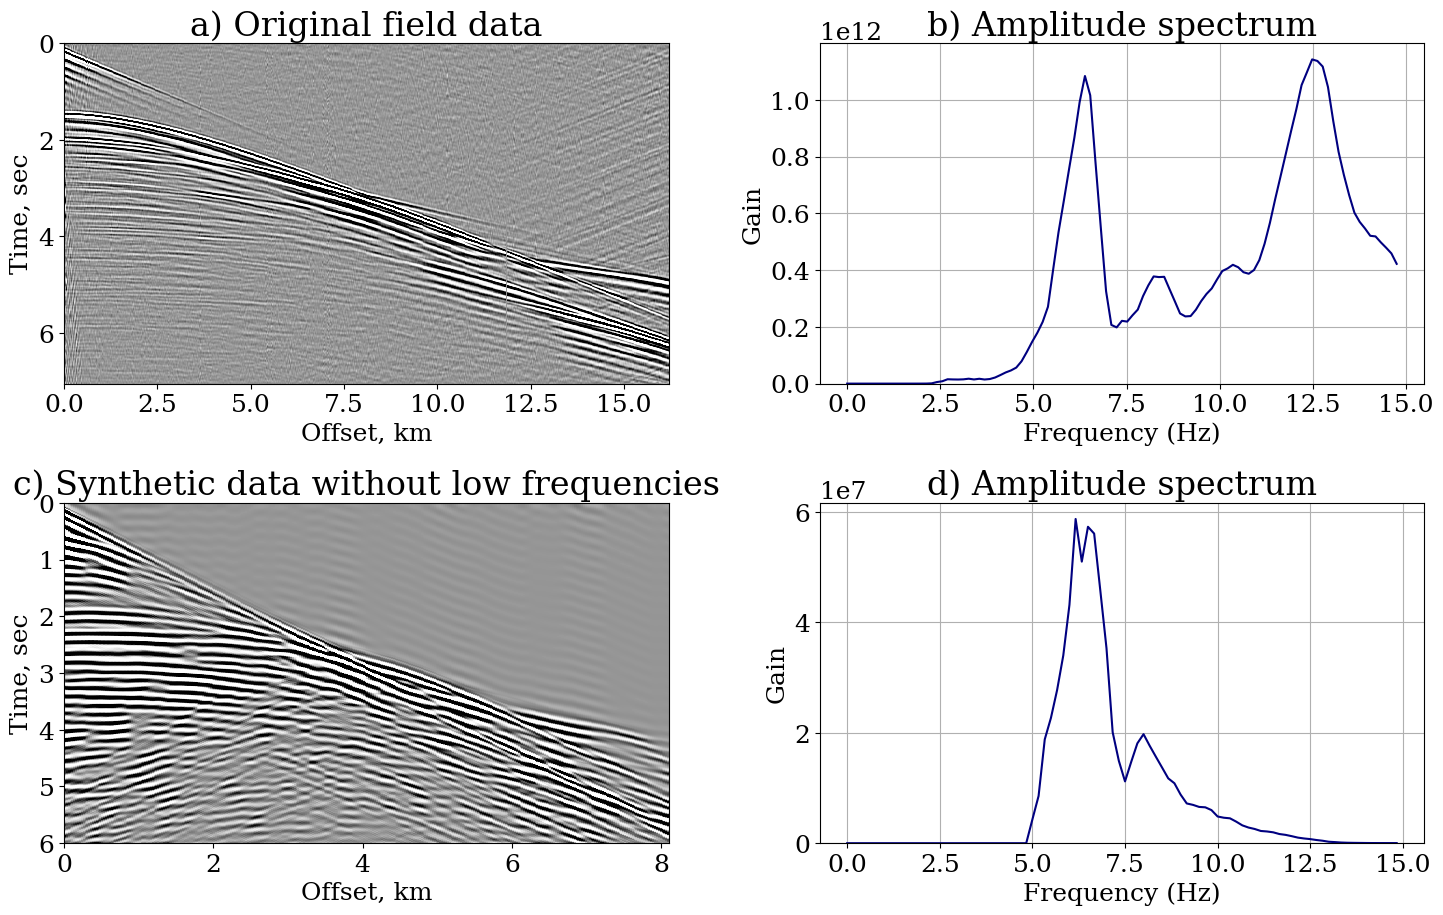

In [8]:
def plot_spectra_dictlist(dictlist, dt, fmax=10, phase=False, title='', norm=False, ampmax=None, ax=None):
    """ Plot multiple spectra of seismic data on the same plot. 
    Input data format:
    [{'data': arr1, 'line': 'r--', 'label': 'data1'},
     {'data': arr2, 'line': 'b', 'label': 'data2'},] """
    if ax is None:
        fig, ax = plt.subplots()
    for d in dictlist:
        ff, ss = get_spectrum(d['data'], dt, phase=phase)
        if ampmax:
            ss[ss > ampmax] = ampmax
        if norm:
            ss /= np.max(np.abs(ss))
        nfmax = int(fmax / (ff[1]-ff[0]))
        ax.plot(ff[:nfmax], ss[:nfmax],
                 d['line'], label=d['label'])
    ax.set_ylim(bottom=0)
    ax.set_xlabel('Frequency (Hz)'); 
    ax.set_ylabel('Gain' if not phase else 'Angle, rad'); 
    ax.set_title(title)
    ax.grid(True); 
#     ax.legend(loc='best');
def get_spectrum(t, dt, phase=False):
    t_fft = np.fft.fft(t)
    if not phase:
        ps = np.sum(np.abs(t_fft) ** 2, axis=-2)
    else:
        ps = np.sum(np.arctan2(np.imag(t_fft), np.real(t_fft)), axis=-2)
    freqs = np.fft.fftfreq(len(ps), dt)
    idx = np.argsort(freqs)
    causal = int(len(ps) // 2)
    freqs, ps = freqs[idx], ps[idx]
    return freqs[-causal:], ps[-causal:] / t.shape[-2]

print(os.getcwd())
# denise_dir='../fwi/cgg_real_data/cnn_14_1/fld'
root_dir='/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master'
data_dir=os.path.join(root_dir,'fwi/ws_fwi_50_strategy_l2_3/Marmousi_true/fld')
field_data_dir=os.path.join(root_dir,'for_pasha/su_field')
# field_data_dir=os.path.join(root_dir,'for_pasha/su_field_high_pass_5_hz')
shots_synthetic,filenames=d.get_shots_from_directory(os.path.join(data_dir,'su'),keys=['_p'],return_filenames=True)
# shots_field,filenames_field=d.get_shots_from_directory(field_data_dir,keys=['_p'],return_filenames=True)
dDT=0.002; dt=dDT
corner_frequency=5
fmax=15
field_shot_index=11
for ishot in [4]:
    fig, ax = plt.subplots(2, 2, figsize=(17,10))
    shot=shots_synthetic[ishot]
    filtered_shot=bandpass(shot,flo=corner_frequency,dt=dDT,order=8,btype='high')
    filtered_shot=zero_below_freq(filtered_shot,corner_frequency,dt,disable=False,reverse=False)
    
#     vis.plot_shot(shot, dt=dDT, dx=12.5, pclip=0.05, colorbar=False, ax=ax[1,0])
#     vis.plot_spectra_dictlist([{'data': shot, 'line': 'navy', 'label': 'Full-band synthetic data'}], dt=dDT, fmax=fmax, norm=False, ax=ax[1,1])
    vis.plot_shot(filtered_shot, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[1,0])
    plot_spectra_dictlist([{'data': filtered_shot, 'line': 'navy', 'label': 'Synthetic data'}], dt=dDT,fmax=fmax, norm=False, ax=ax[1,1])
    
    vis.plot_shot(ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0,0])
    plot_spectra_dictlist([{'data':shot_data, 'line': 'navy', 'label': 'Field data'}], dt=dDT, fmax=100, norm=False, ax=ax[0,1])
title_fontsize=24
ax[0,0].set_title('a) Original field data',fontsize=title_fontsize)
ax[0,1].set_title('b) Amplitude spectrum',fontsize=title_fontsize)
ax[1,0].set_title('c) Synthetic data without low frequencies',fontsize=title_fontsize)
ax[1,1].set_title('d) Amplitude spectrum',fontsize=title_fontsize)
# ax[0,1].legend(loc='center right')
# ax[1,1].legend(loc='center right')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
vis.savefig('data_field_synth2.png')

for ishot in [4]:
    fig, ax = plt.subplots(2, 2, figsize=(17,10))
    shot=shots_synthetic[ishot]
    filtered_shot=bandpass(shot,flo=corner_frequency,dt=dDT,order=8,btype='high')
    filtered_shot=zero_below_freq(filtered_shot,corner_frequency,dt,disable=False,reverse=False)
    
#     vis.plot_shot(shot, dt=dDT, dx=12.5, pclip=0.05, colorbar=False, ax=ax[1,0])
#     vis.plot_spectra_dictlist([{'data': shot, 'line': 'navy', 'label': 'Full-band synthetic data'}], dt=dDT, fmax=fmax, norm=False, ax=ax[1,1])
    vis.plot_shot(filtered_shot, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[1,0])
    plot_spectra_dictlist([{'data': filtered_shot, 'line': 'navy', 'label': 'Synthetic data'}], dt=dDT,fmax=fmax, norm=False, ax=ax[1,1])
    
    vis.plot_shot(ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0,0])
    plot_spectra_dictlist([{'data':shot_data, 'line': 'navy', 'label': 'Field data'}], dt=dDT, fmax=fmax, norm=False, ax=ax[0,1])
title_fontsize=24
ax[0,0].set_title('a) Original field data',fontsize=title_fontsize)
ax[0,1].set_title('b) Amplitude spectrum',fontsize=title_fontsize)
ax[1,0].set_title('c) Synthetic data without low frequencies',fontsize=title_fontsize)
ax[1,1].set_title('d) Amplitude spectrum',fontsize=title_fontsize)
# ax[0,1].legend(loc='center right')
# ax[1,1].legend(loc='center right')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
vis.savefig('data_field_synth3.png')

## Picture to draft

/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/for_pasha
Save /home/plotnips/Dropbox/Apps/Overleaf/draft_Geophysics_FWI_init_model_prediction/paper_geophysics/Fig/data_field_synth4_unfiltered_field.png
Save /home/plotnips/Dropbox/Apps/Overleaf/draft_Geophysics_FWI_init_model_prediction/paper_geophysics/Fig/data_field_synth4_as_before.png


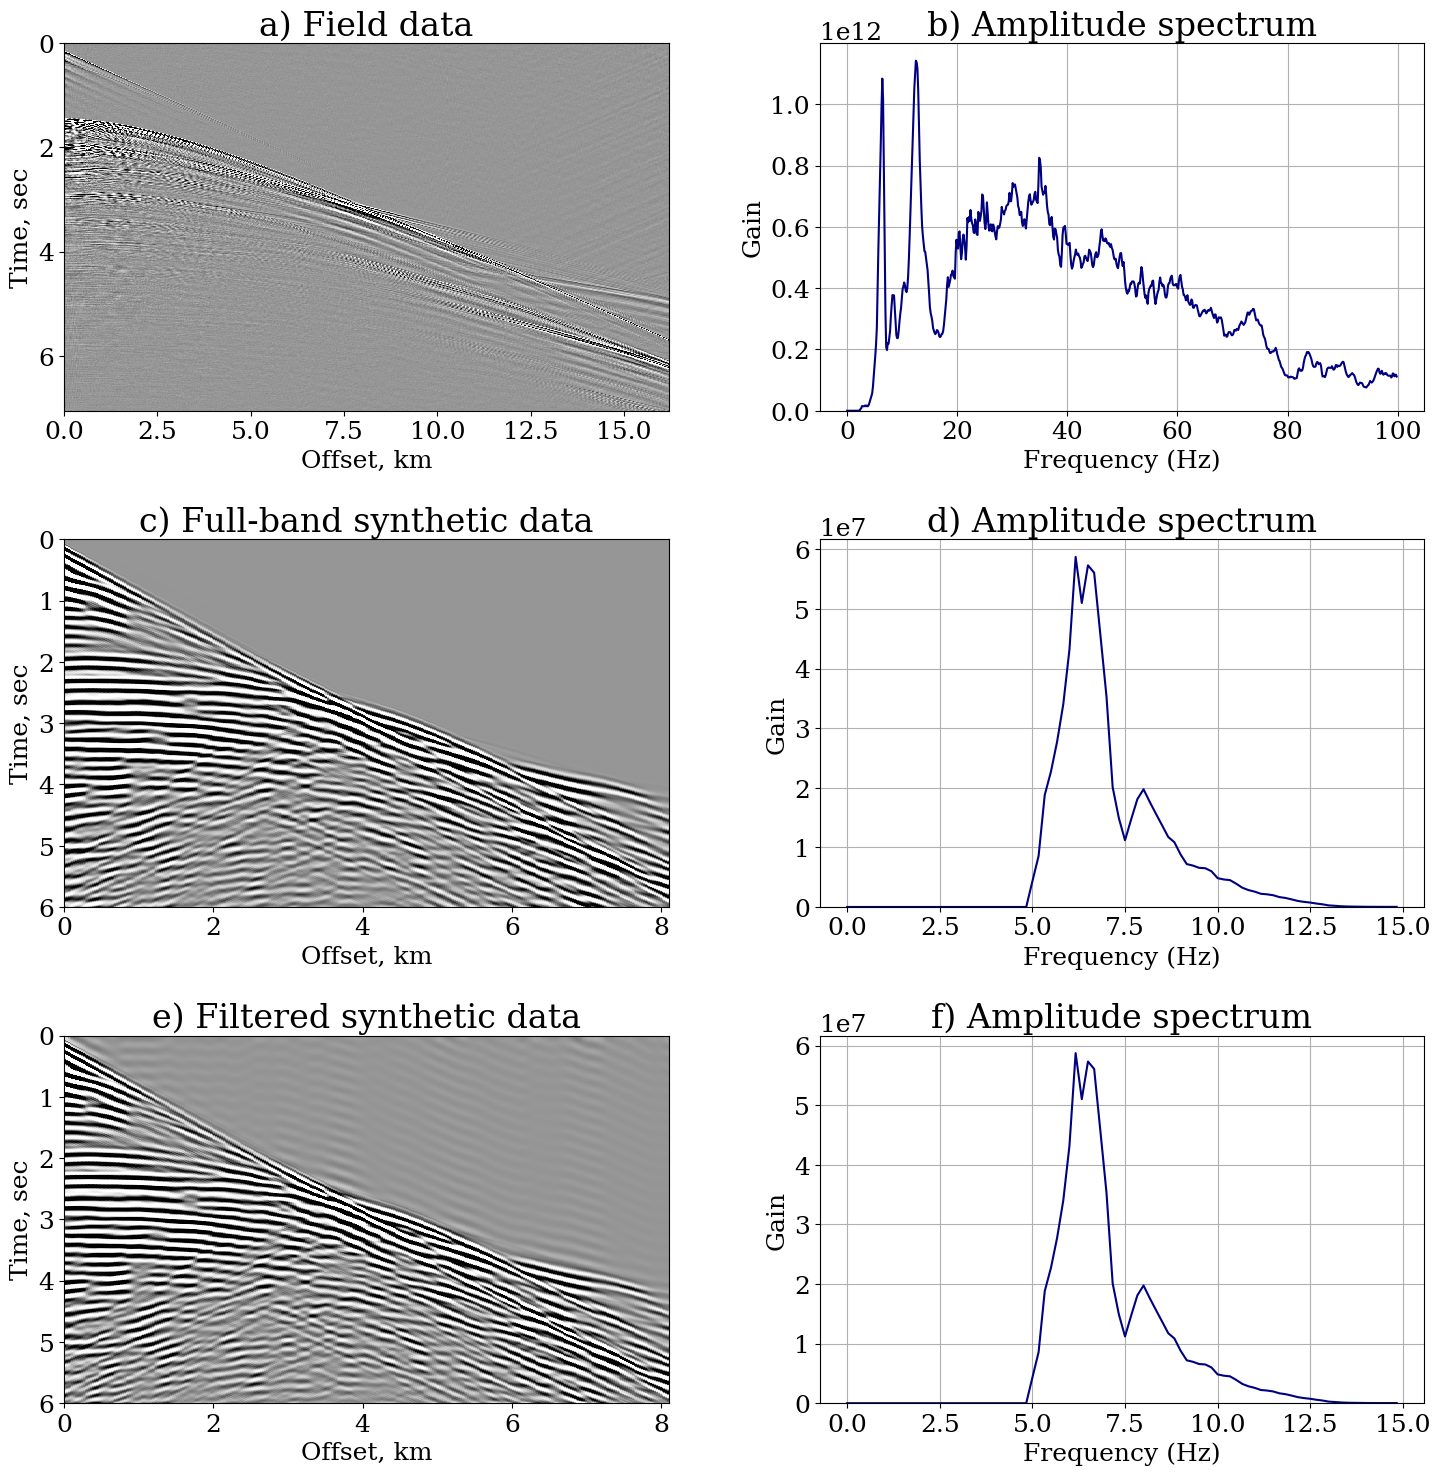

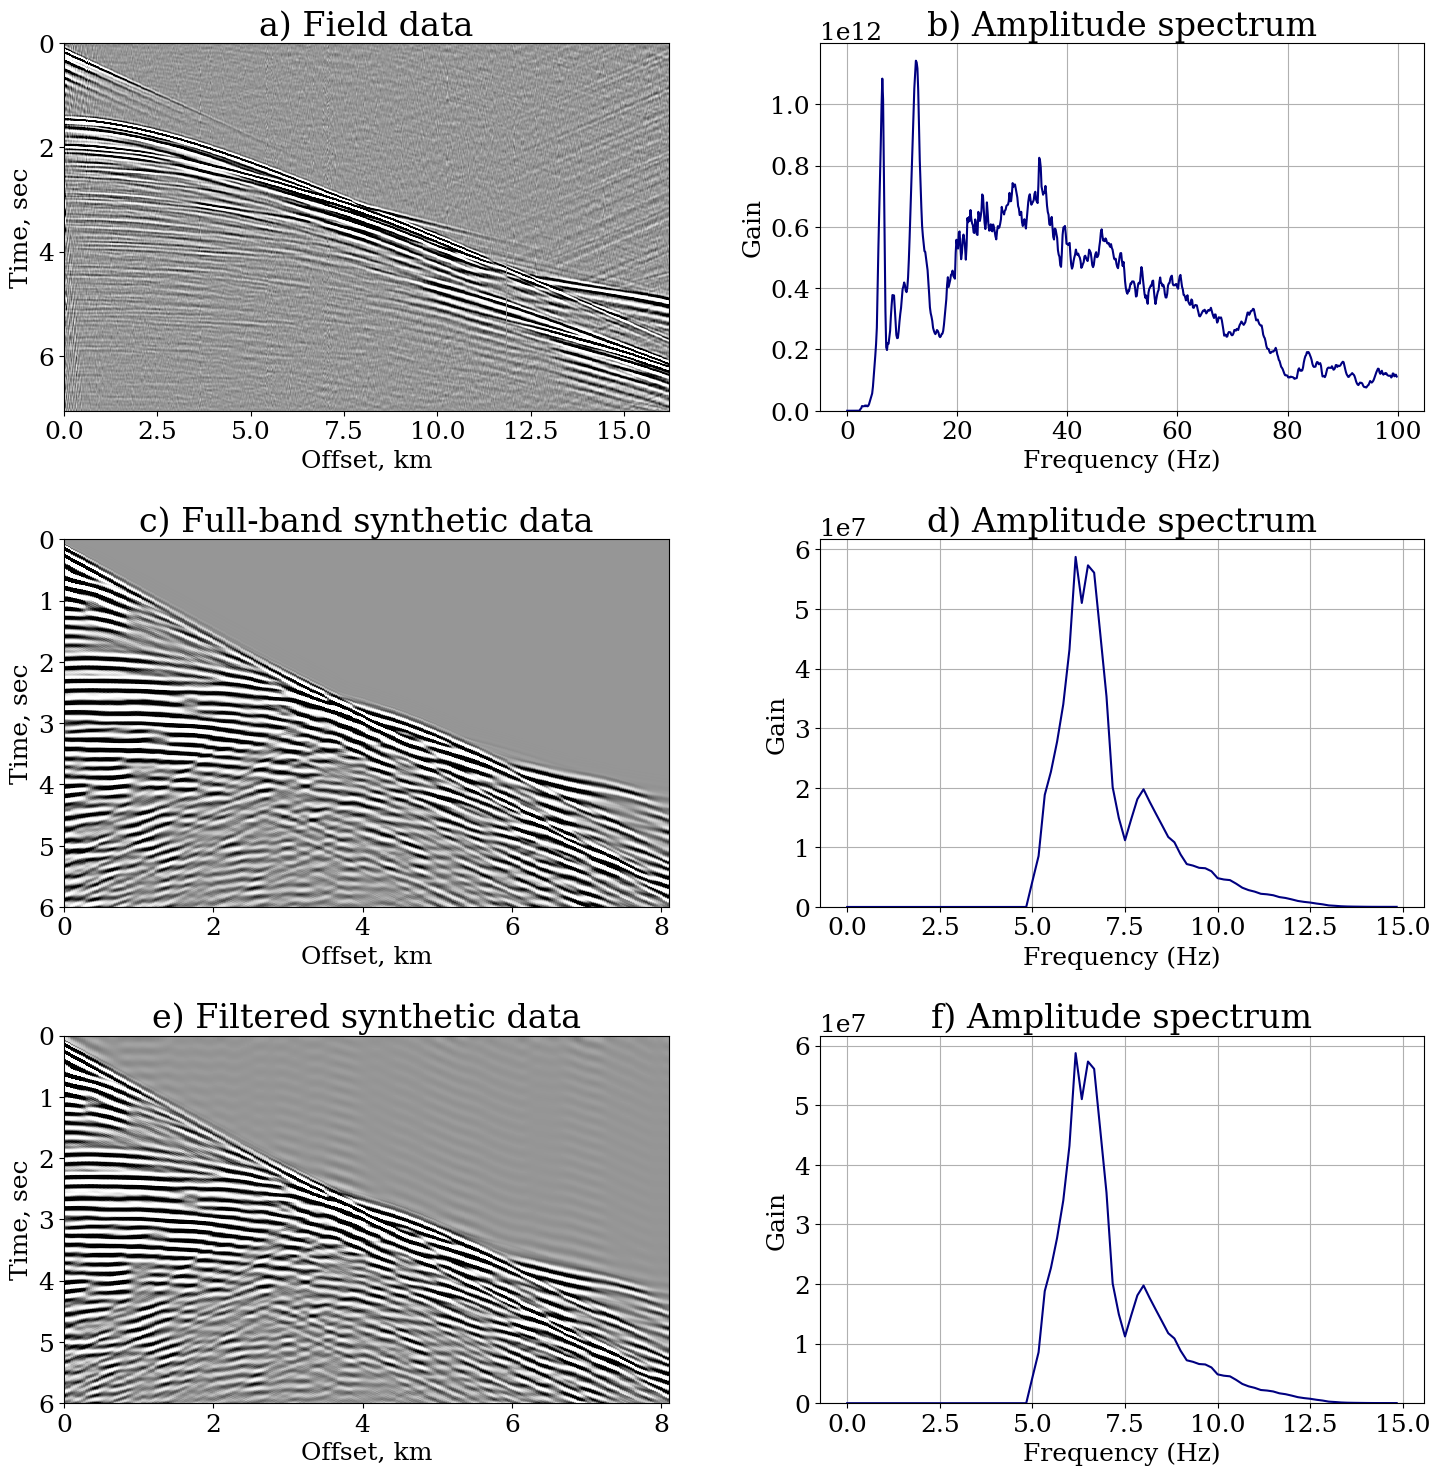

In [9]:
def plot_spectra_dictlist(dictlist, dt, fmax=10, phase=False, title='', norm=False, ampmax=None, ax=None):
    """ Plot multiple spectra of seismic data on the same plot. 
    Input data format:
    [{'data': arr1, 'line': 'r--', 'label': 'data1'},
     {'data': arr2, 'line': 'b', 'label': 'data2'},] """
    if ax is None:
        fig, ax = plt.subplots()
    for d in dictlist:
        ff, ss = get_spectrum(d['data'], dt, phase=phase)
        if ampmax:
            ss[ss > ampmax] = ampmax
        if norm:
            ss /= np.max(np.abs(ss))
        nfmax = int(fmax / (ff[1]-ff[0]))
        ax.plot(ff[:nfmax], ss[:nfmax],
                 d['line'], label=d['label'])
    ax.set_ylim(bottom=0)
    ax.set_xlabel('Frequency (Hz)'); 
    ax.set_ylabel('Gain' if not phase else 'Angle, rad'); 
    ax.set_title(title)
    ax.grid(True); 
#     ax.legend(loc='best');
def get_spectrum(t, dt, phase=False):
    t_fft = np.fft.fft(t)
    if not phase:
        ps = np.sum(np.abs(t_fft) ** 2, axis=-2)
    else:
        ps = np.sum(np.arctan2(np.imag(t_fft), np.real(t_fft)), axis=-2)
    freqs = np.fft.fftfreq(len(ps), dt)
    idx = np.argsort(freqs)
    causal = int(len(ps) // 2)
    freqs, ps = freqs[idx], ps[idx]
    return freqs[-causal:], ps[-causal:] / t.shape[-2]

print(os.getcwd())
root_dir='/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master'
data_dir=os.path.join(root_dir,'fwi/ws_fwi_50_strategy_l2_3/Marmousi_true/fld')
field_data_dir=os.path.join(root_dir,'for_pasha/su_field')
# field_data_dir=os.path.join(root_dir,'for_pasha/su_field_high_pass_5_hz')
shots_synthetic,filenames=d.get_shots_from_directory(os.path.join(data_dir,'su'),keys=['_p'],return_filenames=True)
# shots_field,filenames_field=d.get_shots_from_directory(field_data_dir,keys=['_p'],return_filenames=True)
dDT=0.002; dt=dDT
corner_frequency=5
fmax=15
field_shot_index=11
for ishot in [4]:
#     fig, ax = plt.subplots(3, 2, figsize=(12,14))
#     fig, ax = plt.subplots(3, 2, figsize=(17,10))
    fig, ax = plt.subplots(3, 2, figsize=(17,17))
    shot=np.copy(shots_synthetic[ishot])
    filtered_shot=bandpass(shot,flo=corner_frequency,dt=dDT,order=8,btype='high')
    filtered_shot=zero_below_freq(filtered_shot,corner_frequency,dt,disable=False,reverse=False)
    
    ## unfiltered field data
    vis.plot_shot(shot_data, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0,0])
    plot_spectra_dictlist([{'data':shot_data, 'line': 'navy', 'label': 'Field data'}], dt=dDT, fmax=100, norm=False, ax=ax[0,1])
    
    ## field data low-passed below 15 hz
#     vis.plot_shot(ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0,0])
#     plot_spectra_dictlist([{'data':ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), 'line': 'navy', 'label': 'Field data'}], dt=dDT, fmax=fmax, norm=False, ax=ax[0,1])
    
    vis.plot_shot(shot, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[1,0])
    plot_spectra_dictlist([{'data': filtered_shot, 'line': 'navy', 'label': 'Synthetic data'}], dt=dDT,fmax=fmax, norm=False, ax=ax[1,1])
    
    vis.plot_shot(filtered_shot, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[2,0])
    plot_spectra_dictlist([{'data': filtered_shot, 'line': 'navy', 'label': 'Synthetic data'}], dt=dDT,fmax=fmax, norm=False, ax=ax[2,1])
    
    
title_fontsize=24
ax[0,0].set_title('a) Field data',fontsize=title_fontsize)
ax[0,1].set_title('b) Amplitude spectrum',fontsize=title_fontsize)
ax[1,0].set_title('c) Full-band synthetic data',fontsize=title_fontsize)
ax[1,1].set_title('d) Amplitude spectrum',fontsize=title_fontsize)
ax[2,0].set_title('e) Filtered synthetic data',fontsize=title_fontsize)
ax[2,1].set_title('f) Amplitude spectrum',fontsize=title_fontsize)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
vis.savefig('data_field_synth4_unfiltered_field.png')
# vis.savefig('data_field_synth4_filtered_field.png')

Save /home/plotnips/Dropbox/Apps/Overleaf/draft_Geophysics_FWI_init_model_prediction/paper_geophysics/Fig/data_field_synth_final_version.png


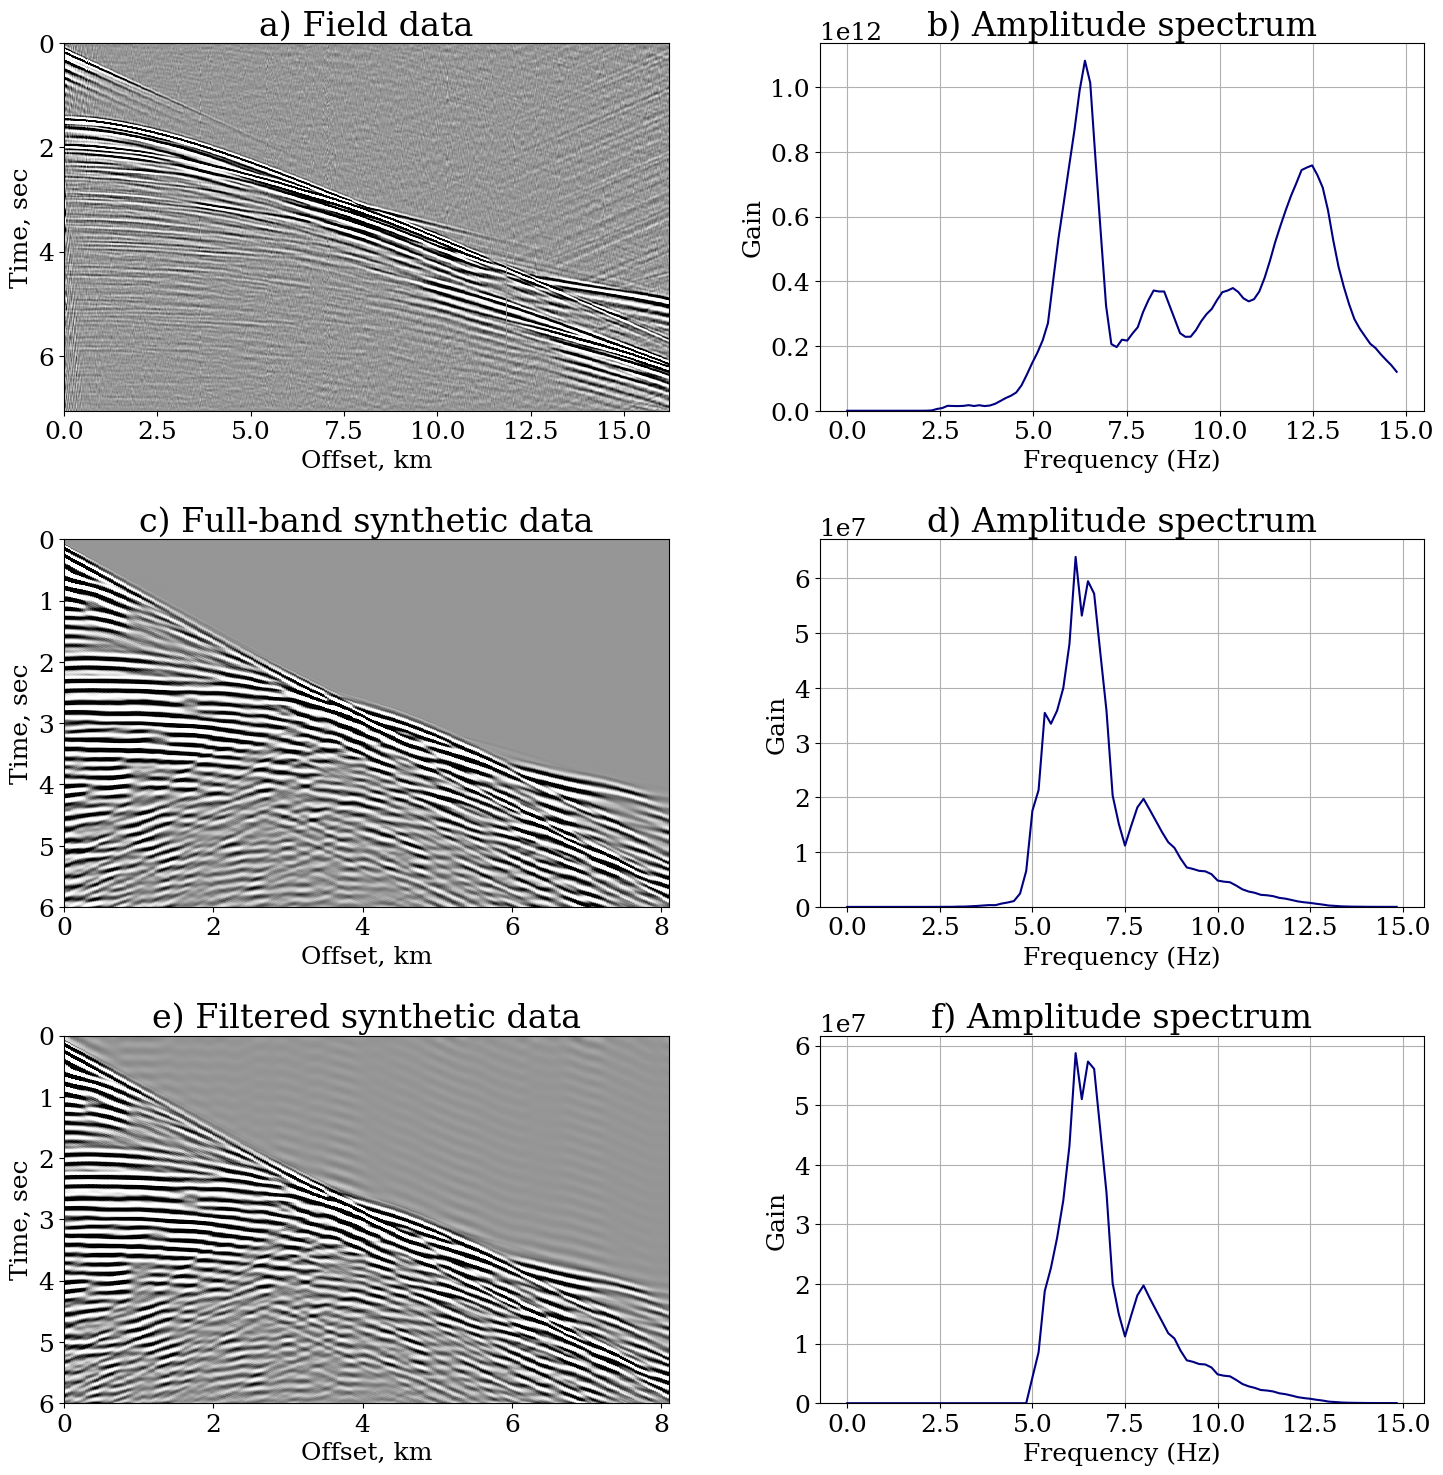

In [11]:
for ishot in [4]:
#     fig, ax = plt.subplots(3, 2, figsize=(12,14))
#     fig, ax = plt.subplots(3, 2, figsize=(17,10))
    fig, ax = plt.subplots(3, 2, figsize=(17,17))
    shot=np.copy(shots_synthetic[ishot])
    filtered_shot=bandpass(shot,flo=corner_frequency,dt=dDT,order=8,btype='high')
    filtered_shot=zero_below_freq(filtered_shot,corner_frequency,dt,disable=False,reverse=False)
    
    ## unfiltered field data
#     vis.plot_shot(ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0,0])
#     plot_spectra_dictlist([{'data':shot_data, 'line': 'navy', 'label': 'Field data'}], dt=dDT, fmax=100, norm=False, ax=ax[0,1])
    
    ## field data low-passed below 15 hz
    vis.plot_shot(ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0,0])
    plot_spectra_dictlist([{'data':ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), 'line': 'navy', 'label': 'Field data'}], dt=dDT, fmax=fmax, norm=False, ax=ax[0,1])
    
    vis.plot_shot(shot, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[1,0])
    plot_spectra_dictlist([{'data': shot, 'line': 'navy', 'label': 'Synthetic data'}], dt=dDT,fmax=fmax, norm=False, ax=ax[1,1])
    
    vis.plot_shot(filtered_shot, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[2,0])
    plot_spectra_dictlist([{'data': filtered_shot, 'line': 'navy', 'label': 'Synthetic data'}], dt=dDT,fmax=fmax, norm=False, ax=ax[2,1])
    
    
title_fontsize=24
ax[0,0].set_title('a) Field data',fontsize=title_fontsize)
ax[0,1].set_title('b) Amplitude spectrum',fontsize=title_fontsize)
ax[1,0].set_title('c) Full-band synthetic data',fontsize=title_fontsize)
ax[1,1].set_title('d) Amplitude spectrum',fontsize=title_fontsize)
ax[2,0].set_title('e) Filtered synthetic data',fontsize=title_fontsize)
ax[2,1].set_title('f) Amplitude spectrum',fontsize=title_fontsize)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
vis.savefig('data_field_synth_final_version.png')

In [ ]:
print(os.getcwd())
dir_for_filtering='/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/fwi/ws_fwi_50_strategy_l2_3/Marmousi_true_filtered'
print(dir_for_filtering)
# denise_folder_process('crop_zero_freqs',dir_for_filtering,denise_root='/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master')

In [ ]:
denise_dir='/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/fwi/ws_fwi_50_strategy_l2_3/Marmousi_true_filtered/fld'
shots_synthetic_filtered,filenames=d.get_shots_from_directory(os.path.join(denise_dir,'su'),keys=['_p'],return_filenames=True)
dDT=0.002
for ishot in [4,8] :
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    shot_data=shots_synthetic_filtered[ishot]
    # vis.plot_shot(ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), dt=dDT, dx=12.5, pclip=0.05, colorbar=False, ax=ax[0]);
#     vis.plot_shot(shot_data, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0]);
#     vis.savefig('raw_shot_scope5.png')
#     vis.plot_spectra_dictlist([{'data': shot_data, 'line': 'navy', 'label': 'Raw data'}], dt=dDT, fmax=20.,norm=False,ax=ax[1])
#     vis.savefig('raw_spec_scope5.png')
    
    vis.plot_shot(shots_synthetic_filtered, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0]);
    vis.plot_spectra_dictlist([{'data': shots_synthetic_filtered, 'line': 'navy', 'label': 'Raw data'}], dt=dDT, fmax=20.,norm=False,ax=ax[1])
    vis.savefig('raw_spec_scope5.png')

In [ ]:
results_root='/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master/mtl_low-work'
paths_2=next(os.walk(os.path.join(results_root)))[1]
paths_3=fnmatch.filter(paths_2,'*out_*')
print(paths_3)
paths_=[]
for p_ in paths_3:
    paths_.append(os.path.join(results_root,p_))
simulation_folders=paths_
# print(simulation_folders)
print(simulation_folders[0])
for simulation_folder in simulation_folders[0::]:
    denise_folder_process('plot',simulation_folder,denise_root='/home/plotnips/Dropbox/Log_extrapolation/scripts/DENISE-Black-Edition-master')
#################################################
# # for simulation_folder in simulation_folders[0:2]:
# for simulation_folder in simulation_folders:
#     shots_oleg,filenames=d.get_shots_from_directory(os.path.join(simulation_folder,'su'),keys=['_p'],return_filenames=True)
#     fig, ax = plt.subplots(1, 2, figsize=(12, 4))
#     shot_data=shots_oleg[0]
#     # vis.plot_shot(ld.bandpass(shot_data, fs=1/dDT, fhi=15, btype='low'), dt=dDT, dx=12.5, pclip=0.05, colorbar=False, ax=ax[0]);
#     vis.plot_shot(shot_data, dt=dDT, dx=25, pclip=0.05, colorbar=False, ax=ax[0]);
#     vis.savefig('raw_shot_scope5.png')
#     vis.plot_spectra_dictlist([{'data': shot_data, 'line': 'navy', 'label': 'Raw data'}], dt=dDT, fmax=4.,norm=False,ax=ax[1])
#     vis.savefig('raw_spec_scope5.png')